In [28]:
features = pd.read_csv("adj_features.csv")
values = pd.read_excel("adj_preped_target.xlsx")

In [29]:
features["target"] = values["target"]

In [30]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE(n_components=3, perplexity=7)

In [32]:
features = features[[x for x in features.columns if x != "Unnamed: 0"]]

In [33]:
features.head()

,04,09,100th,103rd,104th,105th,106th,109th,10th,110th,...,yellow,yemeni,yiddish,young,younger,youngest,yugoslav,zimbabwean,zionist,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.decomposition import PCA

In [35]:
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE(n_components=3, perplexity=5)

In [37]:
sub_features1 = features.sample(frac=0.05)
sub_features = pd.DataFrame(
    PCA(n_components=10).fit_transform(
        sub_features1[[x for x in sub_features1.columns if x != "target"]]
    )
)

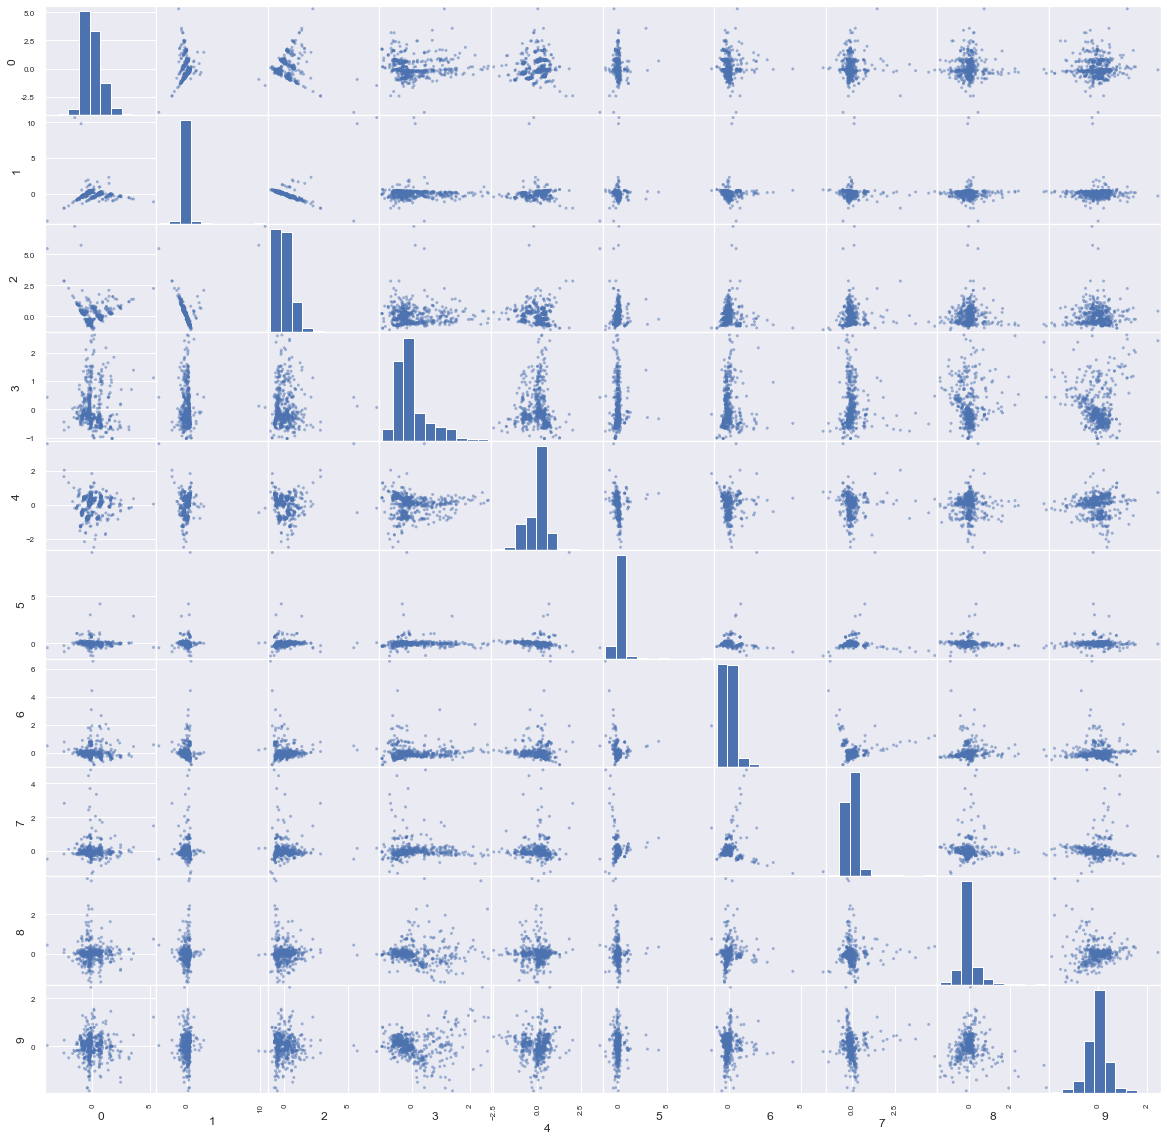

In [38]:
_ = scatter_matrix(sub_features, figsize=(20, 20))

In [39]:
trans = tsne.fit_transform(sub_features)

In [40]:
trans.shape

(604, 3)

In [41]:
trans_df = pd.DataFrame(trans, columns=[f"tnse {x}" for x in range(3)])
trans_df["target"] = sub_features1["target"]

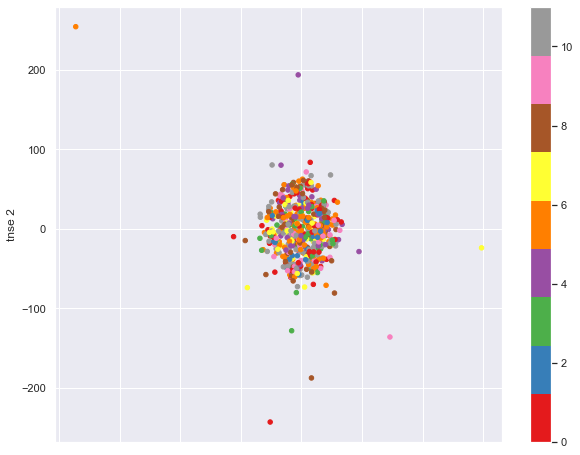

In [42]:
trans_df.plot.scatter("tnse 1", "tnse 2", c=sub_features1["target"], cmap="Set1")

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=3)

In [45]:
pca_trans = pca.fit_transform(features[[x for x in features.columns if x != "target"]])

In [46]:
pca_df = pd.DataFrame(pca_trans, columns=[f"pca {x}" for x in range(3)])

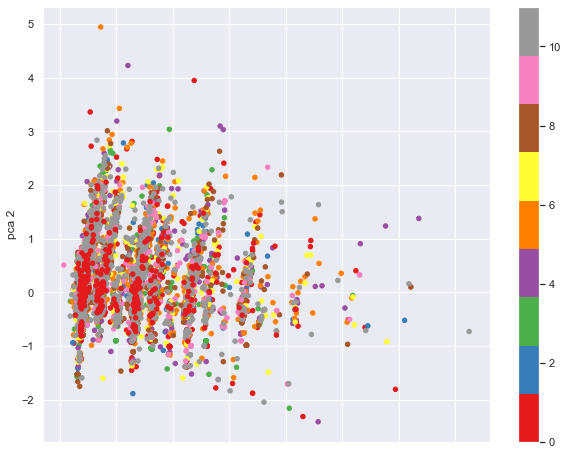

In [47]:
pca_df.plot.scatter("pca 1", "pca 2", c=features["target"], cmap="Set1")